<a href="https://colab.research.google.com/github/YasminForestti/Processo-seletivo-Analytica-2022/blob/main/notifica%C3%A7%C3%A3o_no_mundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1)** Importação das bibliotecas e definições de escalas de cores

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
colors=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
colors2= ["#577590","#43aa8b","#90be6d","#f9c74f","#f8961e","#f3722c","#f94144"]

In [4]:
Pais = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pais.csv")

In [12]:
direitos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/omophobia.csv",encoding='ISO-8859-1',sep=';')

In [6]:
Pais.head()

,ano,pais_ingles,homicidios
0,2008,All regions,148.0
1,2009,All regions,224.0
2,2010,All regions,233.0
3,2011,All regions,271.0
4,2012,All regions,312.0


In [13]:
direitos.head()

,COUNTRY,CSSSA LEGAL?,DATE OF DECRIM,MAX PENALTY,CONST.,BROAD PROT.,EMPLOY.,HATE CRIME,INCITEMENT,BAN CONV. THERAPIES,SAME SEX MARRIAGE,CIVIL UNIONS,JOINT ADOPTION,SECOND PARENT ADOPTION
0,Algeria,NO,-,2,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,Angola,YES,2021,-,NO,YES,YES,YES,YES,NO,NO,NO,NO,NO
2,Benin,YES,NEVER CRIM,-,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
3,Botswana,YES,2019,-,NO,NO,YES,NO,NO,NO,NO,NO,NO,NO
4,Burkina Faso,YES,NEVER CRIM,-,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


##**2)** Manipulação dos dados

In [8]:
filtro = Pais['pais_ingles'] != 'All regions'	
Pais = Pais[filtro]

In [10]:
pais_homicidio_total = Pais.groupby(by = 'pais_ingles').sum().reset_index()
pais_homicidio_total= pais_homicidio_total.drop(columns = ['ano'])

In [11]:
pais_homicidio_total

,pais_ingles,homicidios
0,Afghanistan,1.0
1,Albania,1.0
2,Algeria,1.0
3,Argentina,65.0
4,Australia,2.0
...,...,...
65,Turkey,51.0
66,UK,10.0
67,USA,212.0
68,Uganda,2.0


Há 195 países no mundo (contando com Vaticano e Palestina), como há apenas registro de homídio em 70 países é possível ver que mais da metade dos países não estão incluidos no bando de dados. 

In [15]:
filtro = direitos['CSSSA LEGAL?'] == 'NO'
Pais_criminalizado = direitos[filtro]
Pais_criminalizado = Pais_criminalizado.drop(columns = ['DATE OF DECRIM','MAX PENALTY','CONST.','BROAD PROT.','EMPLOY.','HATE CRIME','INCITEMENT','BAN CONV. THERAPIES','SAME SEX MARRIAGE','CIVIL UNIONS','JOINT ADOPTION','SECOND PARENT ADOPTION']) 
Pais_criminalizado

,COUNTRY,CSSSA LEGAL?
0,Algeria,NO
5,Burundi,NO
6,Cameroon,NO
9,Chad,NO
10,Comoros,NO
...,...,...
188,Samoa,NO
189,Solomon Islands,NO
190,Tonga,NO
191,Tuvalu,NO


aqui eu verifico quais países ainda é ilegal ser lgbt. No total, são 68 países.

In [16]:
ilegal_tem_dados = Pais_criminalizado.loc[Pais_criminalizado['COUNTRY'].isin(pais_homicidio_total['pais_ingles'])].reset_index(drop=True)

In [17]:
ilegal_tem_dados

,COUNTRY,CSSSA LEGAL?
0,Algeria,NO
1,Liberia,NO
2,Mauritius,NO
3,Tanzania,NO
4,Uganda,NO
5,Guyana,NO
6,Jamaica,NO
7,Afghanistan,NO
8,Iran,NO
9,Malaysia,NO


Aqui é possível ver que dos 69 locais onde é ilegal ser lgbt apenas 13 tem dados de homcídios de pessoas transexuais.

In [19]:
filtro = direitos['CSSSA LEGAL?'] == 'YES'
Pais_legal = direitos[filtro]
Pais_legal = Pais_legal.drop(columns = ['DATE OF DECRIM','MAX PENALTY','CONST.','BROAD PROT.','EMPLOY.','HATE CRIME','INCITEMENT','BAN CONV. THERAPIES','SAME SEX MARRIAGE','CIVIL UNIONS','JOINT ADOPTION','SECOND PARENT ADOPTION']) 
Pais_legal

,COUNTRY,CSSSA LEGAL?
1,Angola,YES
2,Benin,YES
3,Botswana,YES
4,Burkina Faso,YES
7,Cabo Verde,YES
...,...,...
236,Tokelau (NZ),YES
237,Turks and Caicos (UK),YES
238,US Virgin Islands (USA),YES
239,Vatican City,YES


In [20]:
legal_tem_dados = Pais_legal.loc[Pais_legal['COUNTRY'].isin(pais_homicidio_total['pais_ingles'])].reset_index(drop=True)

Aqui verificamos que das 171 regiões que são legalizadas o casamento, em 45 obtivemos informação.

In [22]:
data = {
    "homicídios":[13,69],
    "label":["Número de regiões com informações","Número de regiões sem informações"]
}
Paises_ilegais = pd.DataFrame(data, index= [0,1]) 

In [23]:
Paises_ilegais

,homicídios,label
0,13,Número de países com informações
1,69,Número de países sem informações


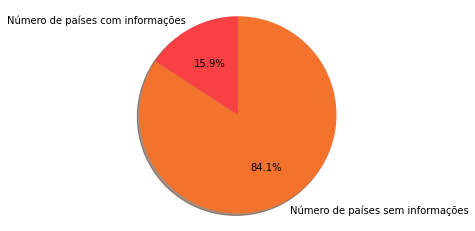

In [24]:
labels = Paises_ilegais['label']
tam = Paises_ilegais['homicídios'].tolist()
ax = plt.subplot()
ax.pie(tam,labels=labels,autopct = '%1.1f%%',startangle = 90,colors=colors,shadow = True)
ax.axis('equal')
plt.show()

In [25]:
data = {
    "homicídios":[45,171],
    "label":["Número de regiões com informações","Número de regiões sem informações"]
}
Paises_legais = pd.DataFrame(data, index= [0,1]) 

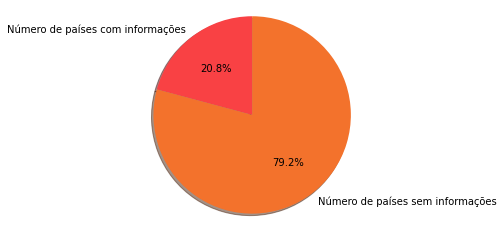

In [26]:
labels = Paises_legais['label']
tam = Paises_legais['homicídios'].tolist()
ax = plt.subplot()
ax.pie(tam,labels=labels,autopct = '%1.1f%%',startangle = 90,colors=colors,shadow = True)
ax.axis('equal')
plt.show()